<a href="https://colab.research.google.com/github/MegaKruk/PWr-SMA-Project/blob/master/SMA_exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple Moving Average for stores in UK
Dickey Fuller Test Results for UK:
Test Statistic                  0.000512
p-value                         0.958574
#Lags Used                      7.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
dtype: float64
Test Statistic                  0.000512
p-value                         0.958574
#Lags Used                      7.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
dtype: float64
Test Statistic                  0.000512
p-value                         0.958574
#Lags Used                      7.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64
Simple Moving Average for stores not in UK
Dickey Fuller Test Results for non-UK:
Test Statistic                 -3.790913
p-value             

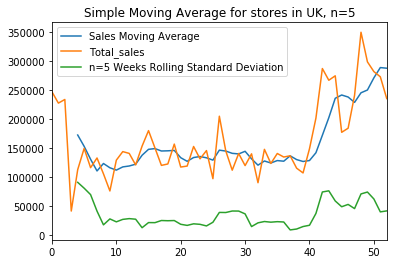

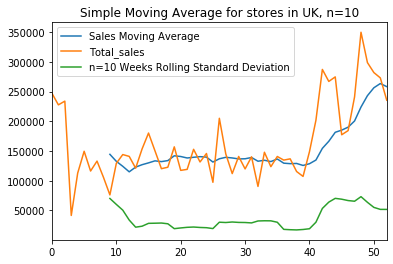

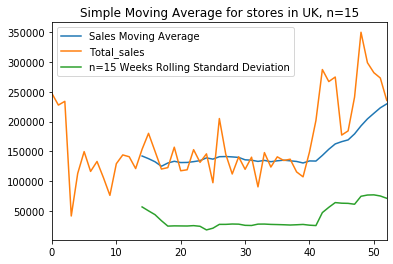

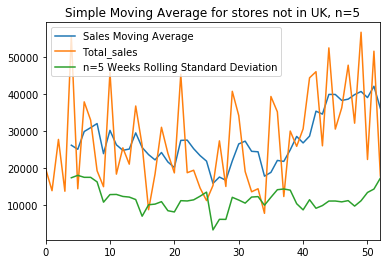

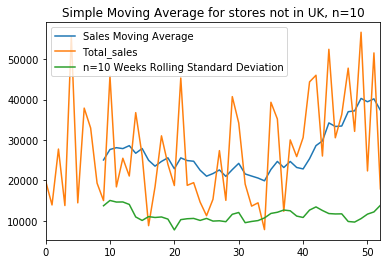

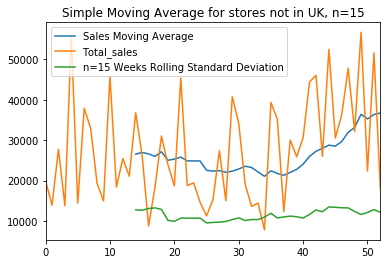

In [0]:
#imports
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('online_retail_II.xlsx')
df = df.drop(["Customer ID", "StockCode", "Description","Invoice"], axis=1)
df = df.drop(df[df.Quantity < 0].index)
df['Sales'] = df.Price * df.Quantity # adds new column Sales = price * quantity
df = df.drop(["Price", "Quantity"], axis=1)
df.InvoiceDate.value_counts()
df['date_week'] = df['InvoiceDate'].apply(lambda x: x.isocalendar()[1])
df['date_year'] = df['InvoiceDate'].apply(lambda x: x.isocalendar()[0])
UK_count_sales = df.groupby([df['Country']=="United Kingdom"])['Sales'].count()
UK_sales = df[df['Country'] == 'United Kingdom']
NUK_sales = df[df['Country'] != 'United Kingdom']
week_s_UK = UK_sales.groupby([df['date_year'],df['date_week']])['Sales'].sum().reset_index(name ='Total_sales')
week_s_NUK = NUK_sales.groupby([df['date_year'],df['date_week']])['Sales'].sum().reset_index(name ='Total_sales')
#print(week_s_UK)
#print(week_s_NUK)

# Simple Moving Average
print('Simple Moving Average for stores in UK')
week_s_UK['Sales Moving Average'] = week_s_UK['Total_sales'].rolling(5).mean()
week_s_UK.plot(kind='line', y= ['Sales Moving Average', 'Total_sales'])
week_s_UK['Total_sales'].rolling(5).std().plot(label='n=5 Weeks Rolling Standard Deviation')
plt.title('Simple Moving Average for stores in UK, n=5')
plt.legend()
week_s_UK['Sales Moving Average'] = week_s_UK['Total_sales'].rolling(10).mean()
week_s_UK.plot(kind='line', y= ['Sales Moving Average', 'Total_sales'])
week_s_UK['Total_sales'].rolling(10).std().plot(label='n=10 Weeks Rolling Standard Deviation')
plt.title('Simple Moving Average for stores in UK, n=10')
plt.legend()
week_s_UK['Sales Moving Average'] = week_s_UK['Total_sales'].rolling(15).mean()
week_s_UK.plot(kind='line', y= ['Sales Moving Average', 'Total_sales'])
week_s_UK['Total_sales'].rolling(15).std().plot(label='n=15 Weeks Rolling Standard Deviation')
plt.title('Simple Moving Average for stores in UK, n=15')
plt.legend()
# Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller
print('Dickey Fuller Test Results for UK:')
dftest = adfuller(week_s_UK['Total_sales'], autolag='AIC')
dfres = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for a, b in dftest[4].items():
    dfres['Critical Value (%s)'%a] = b
    print(dfres)

print('Simple Moving Average for stores not in UK')
week_s_NUK['Sales Moving Average'] = week_s_NUK['Total_sales'].rolling(5).mean()
week_s_NUK.plot(kind='line', y= ['Sales Moving Average', 'Total_sales'])
week_s_NUK['Total_sales'].rolling(5).std().plot(label='n=5 Weeks Rolling Standard Deviation')
plt.title('Simple Moving Average for stores not in UK, n=5')
plt.legend()
week_s_NUK['Sales Moving Average'] = week_s_NUK['Total_sales'].rolling(10).mean()
week_s_NUK.plot(kind='line', y= ['Sales Moving Average', 'Total_sales'])
week_s_NUK['Total_sales'].rolling(10).std().plot(label='n=10 Weeks Rolling Standard Deviation')
plt.title('Simple Moving Average for stores not in UK, n=10')
plt.legend()
week_s_NUK['Sales Moving Average'] = week_s_NUK['Total_sales'].rolling(15).mean()
week_s_NUK.plot(kind='line', y= ['Sales Moving Average', 'Total_sales'])
week_s_NUK['Total_sales'].rolling(15).std().plot(label='n=15 Weeks Rolling Standard Deviation')
plt.title('Simple Moving Average for stores not in UK, n=15')
plt.legend()
# Dickey Fuller Test
print('Dickey Fuller Test Results for non-UK:')
dftest2 = adfuller(week_s_NUK['Total_sales'], autolag='AIC')
dfres2 = pd.Series(dftest2[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for a,b in dftest2[4].items():
    dfres2['Critical Value (%s)'%a] = b
    print(dfres2)



NON UK SALES ACF and PACF
 UK SALES ACF and PACF


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


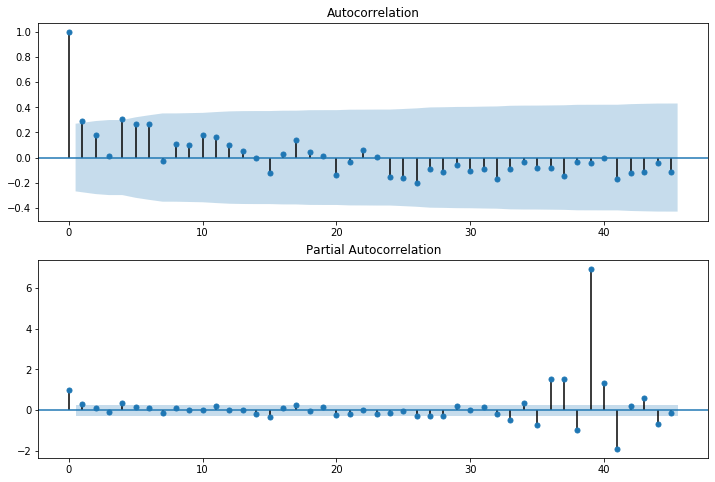

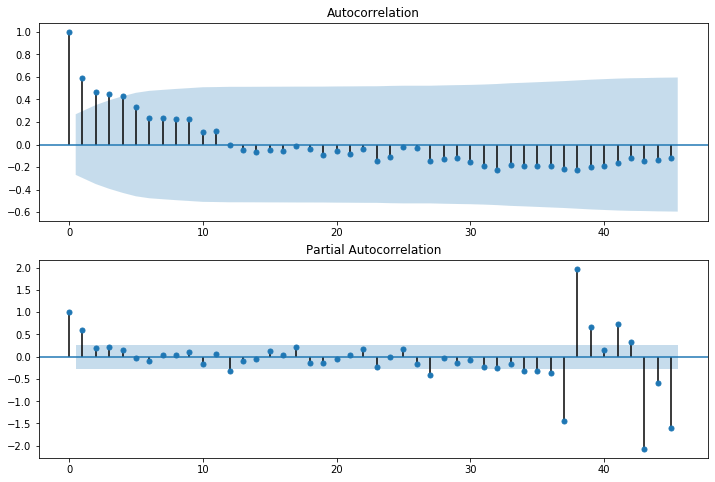

In [0]:
import statsmodels.api as sm
#NON UK SALES ACF and PACF
ig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(week_s_NUK.Total_sales, lags=45, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(week_s_NUK.Total_sales, lags=45, ax=ax2)# , lags=40

# UK SALES ACF and PACF
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(week_s_UK.Total_sales, lags=45, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(week_s_UK.Total_sales, lags=45, ax=ax2)# , lags=40

ARIMA for stores in UK
53   -78236.020245
dtype: float64
                             ARIMA Model Results                              
Dep. Variable:          D.Total_sales   No. Observations:                   52
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -638.005
Method:                       css-mle   S.D. of innovations          51384.179
Date:                Thu, 12 Dec 2019   AIC                           1284.009
Time:                        04:27:03   BIC                           1291.814
Sample:                             1   HQIC                          1287.002
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3645.4478   3126.035      1.166      0.249   -2481.468    9772.364
ar.L1.D.Total_sales     0.1697      0.229      

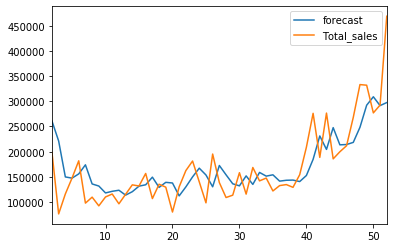

In [0]:
print('ARIMA for stores in UK')
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(week_s_UK["Total_sales"], order=(1, 1, 1))
model_fit = model.fit(disp=False,start_ar_lags=13)
# make prediction
yhat = model_fit.predict(len(week_s_UK), len(week_s_UK), typ='linear')
print(yhat)

print(model_fit.summary())
model_fit.plot_predict(dynamic=False)
plt.show()

ARIMA for stores not in UK
53    6845.23575
dtype: float64
                             ARIMA Model Results                              
Dep. Variable:          D.Total_sales   No. Observations:                   52
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -564.057
Method:                       css-mle   S.D. of innovations          11989.309
Date:                Thu, 12 Dec 2019   AIC                           1136.114
Time:                        04:44:19   BIC                           1143.919
Sample:                             1   HQIC                          1139.107
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 444.8955    117.210      3.796      0.000     215.168     674.623
ar.L1.D.Total_sales     0.0863      0.139    

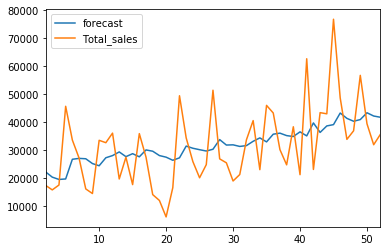

In [0]:
print('ARIMA for stores not in UK')
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(week_s_NUK["Total_sales"], order=(1, 1, 1))
model_fit = model.fit(disp=False,start_ar_lags=13)
# make prediction
yhat = model_fit.predict(len(week_s_NUK), len(week_s_NUK), typ='linear')
print(yhat)

print(model_fit.summary())
model_fit.plot_predict(dynamic=False)
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


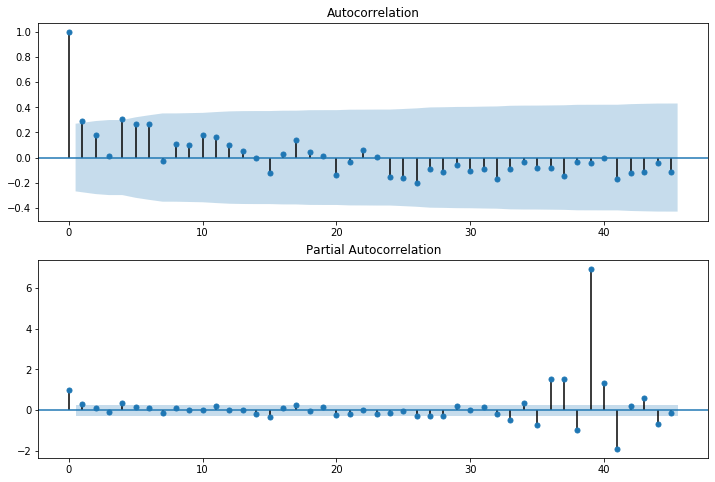

In [0]:
import statsmodels.api as sm
#NON UK SALES ACF and PACF
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(week_s_NUK.Total_sales, lags=45, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(week_s_NUK.Total_sales, lags=45, ax=ax2)# , lags=40

# UK SALES ACF and PACF
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(week_s_UK.Total_sales, lags=45, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(week_s_UK.Total_sales, lags=45, ax=ax2)# , lags=40

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


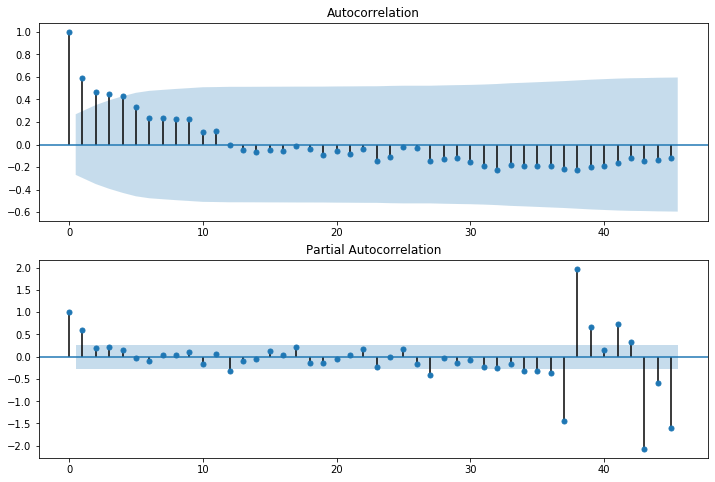